In [40]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Setting default figure size
plt.rcParams['figure.figsize'] = [20, 10]

df = pd.read_csv('C:/Users/zyplo/Documents/GitHub/ECE 143/ECE143_Group8/Data/pranav_cleaned_data/AADT/combined_aadt_2017_2022.csv')
# print("Head: \n", df.head(), "\n")
# print("Describe: \n", df.describe(), "\n")
# print("Value Counts: \n", df.value_counts(), "\n")

# Adding total hour/monthy/AADT counts to dataframe (ex. TOTAL_PEAK_HOUR = BACK_PEAK_HOUR + AHEAD_PEAK_HOUR)
df.insert(8, 'TOTAL_PEAK_HOUR', df['BACK_PEAK_HOUR'] + df['AHEAD_PEAK_HOUR'])
df.insert(9, 'TOTAL_PEAK_MADT', df['BACK_PEAK_MADT'] + df['AHEAD_PEAK_MADT'])
df.insert(10, 'TOTAL_AADT', df['BACK_AADT'] + df['AHEAD_AADT'])

# Removing all rows with PEAK_HOUR, PEAK_MADT, AADT NaN values
df.dropna(subset=['BACK_PEAK_HOUR', 'BACK_PEAK_MADT', 'BACK_AADT', 'AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT', 'AHEAD_AADT'])

# Creating a sub-dataframe with only San Diego County data
sd_df = df[df['CNTY'] == 'SD'] 

# Creating dataframe for truck-specific AADT data
truck_df = pd.read_csv('C:/Users/zyplo/Documents/GitHub/ECE 143/ECE143_Group8/Data/pranav_cleaned_data/truck_AADT/combined_truck_aadt_2017_2022.csv')

# Removing all rows with RTE, TRK_PERCENT_TOT, YEAR NaN values
truck_df.dropna(subset=['RTE', 'TRK_PERCENT_TOT', 'YEAR'])

# Converting all routes to strings, unifying route number formatting
truck_df['RTE'] = truck_df['RTE'].astype(str)
truck_df['RTE'] = truck_df['RTE'].str.lstrip('0')

# Creating sub-dataframe with routes of interest
sub_truck_df = truck_df[truck_df['RTE'].isin(['5', '8', '10', '15', '40', '80'])].copy()


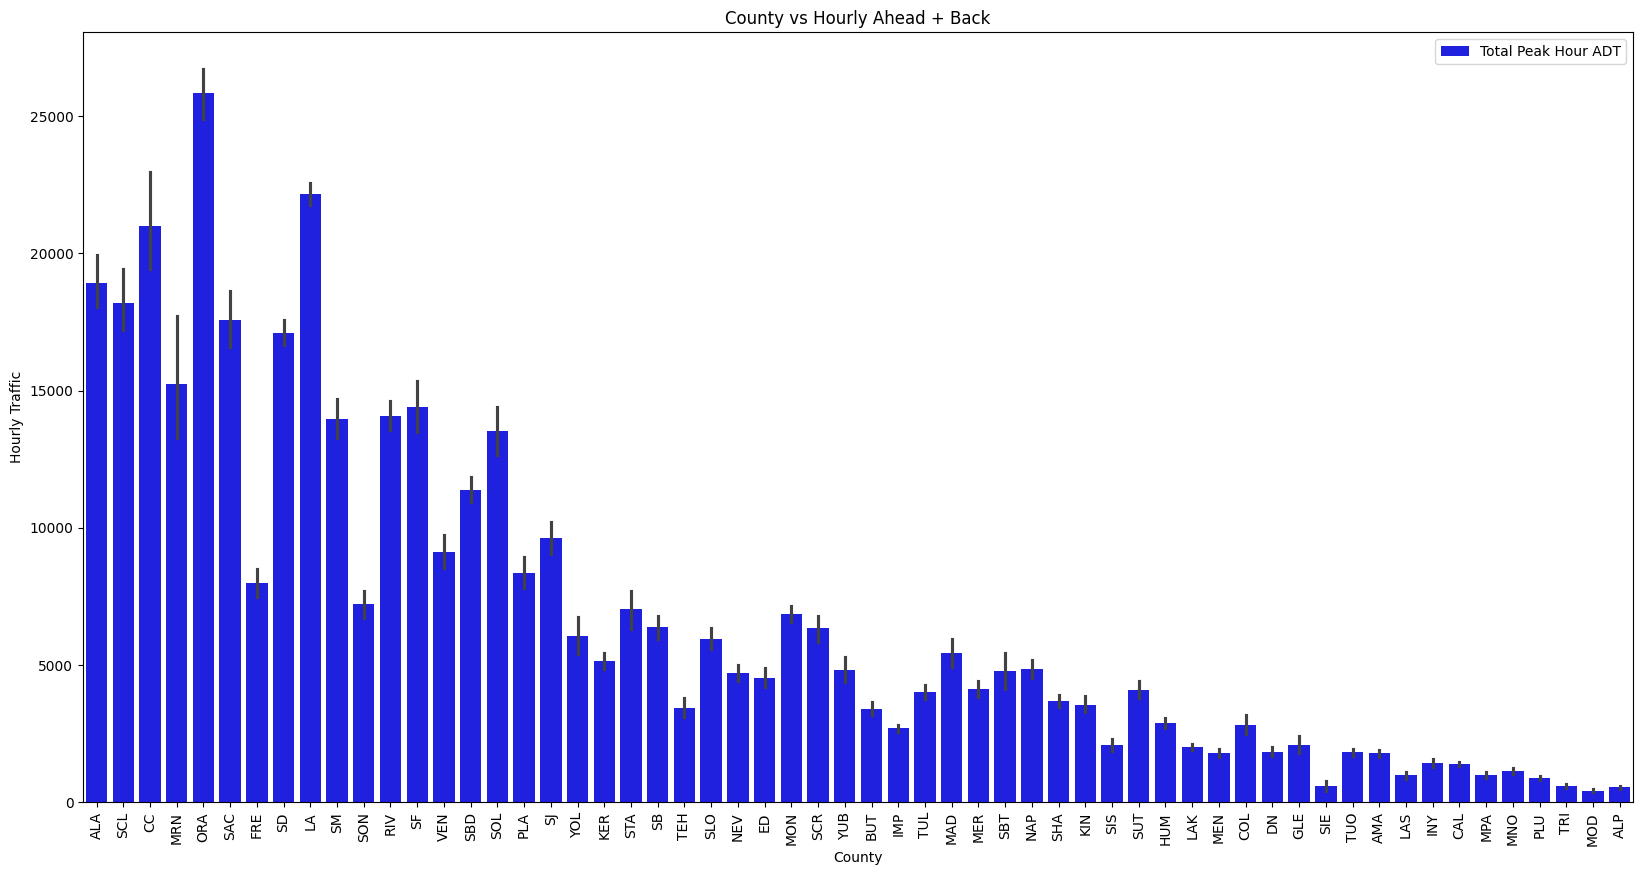

In [34]:
# Graph 1: County vs Hourly Ahead + Back
sns.barplot(x='CNTY', y='TOTAL_PEAK_HOUR', data=df, order=df.sort_values('TOTAL_PEAK_HOUR', ascending=False).CNTY, color='blue', label='Total Peak Hour ADT')
plt.pyplot.xlabel('County')
plt.pyplot.ylabel('Hourly Traffic')
plt.pyplot.title('County vs Hourly Ahead + Back')
plt.pyplot.legend()
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

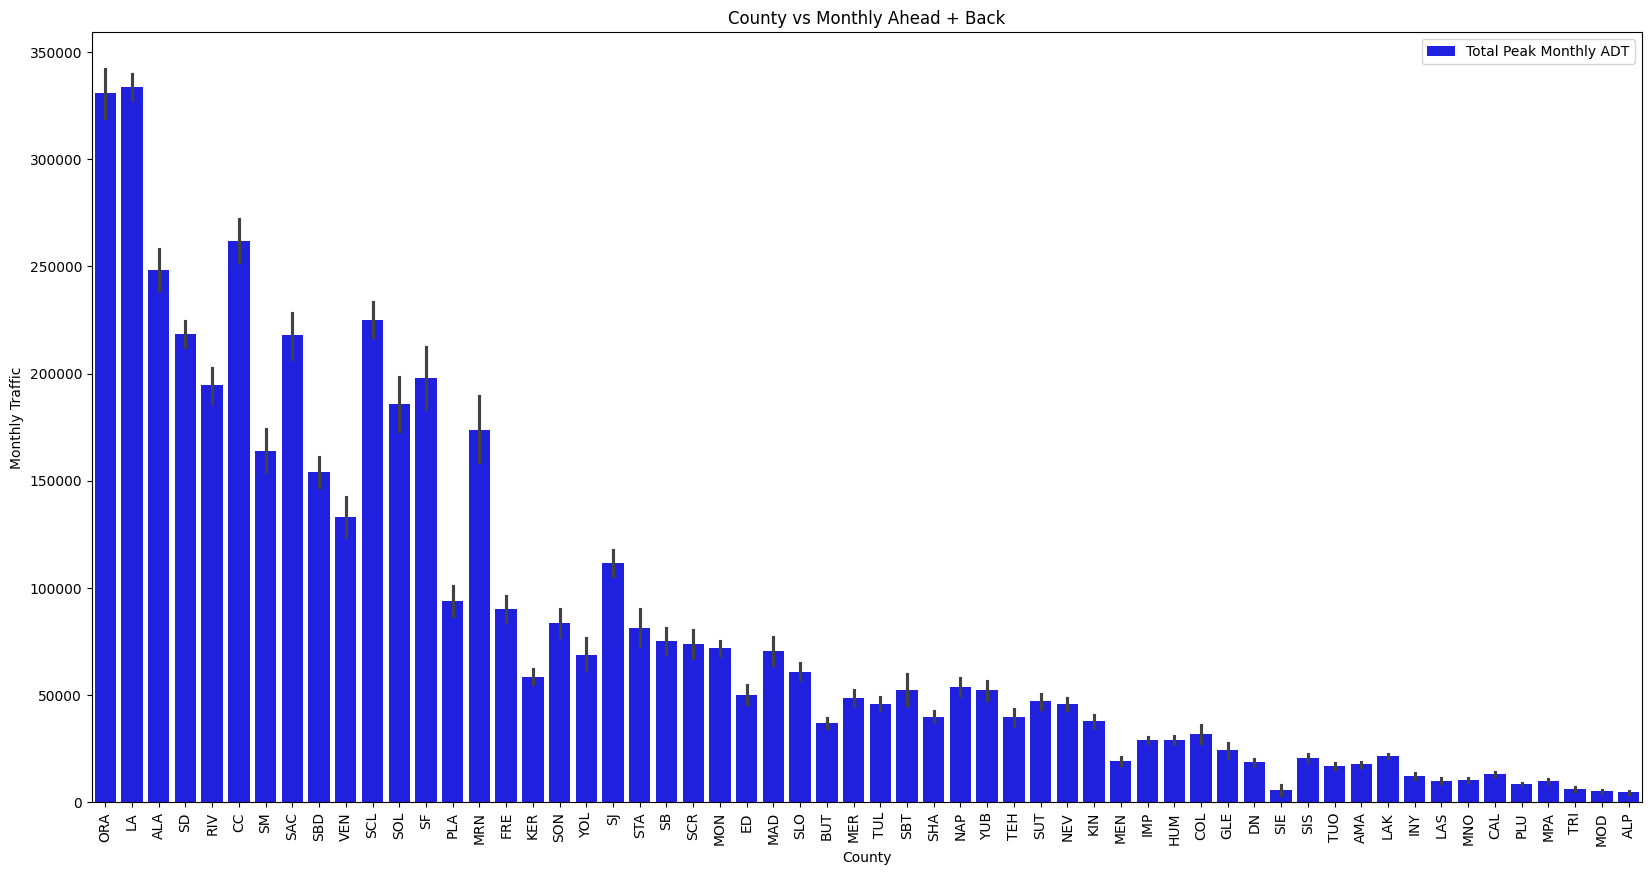

In [35]:

# Graph 2: County vs Monthly Ahead + Back
sns.barplot(x='CNTY', y='TOTAL_PEAK_MADT', data=df, order=df.sort_values('TOTAL_PEAK_MADT', ascending=False).CNTY, color='blue', label='Total Peak Monthly ADT')
plt.pyplot.xlabel('County')
plt.pyplot.ylabel('Monthly Traffic')
plt.pyplot.title('County vs Monthly Ahead + Back')
plt.pyplot.legend()
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

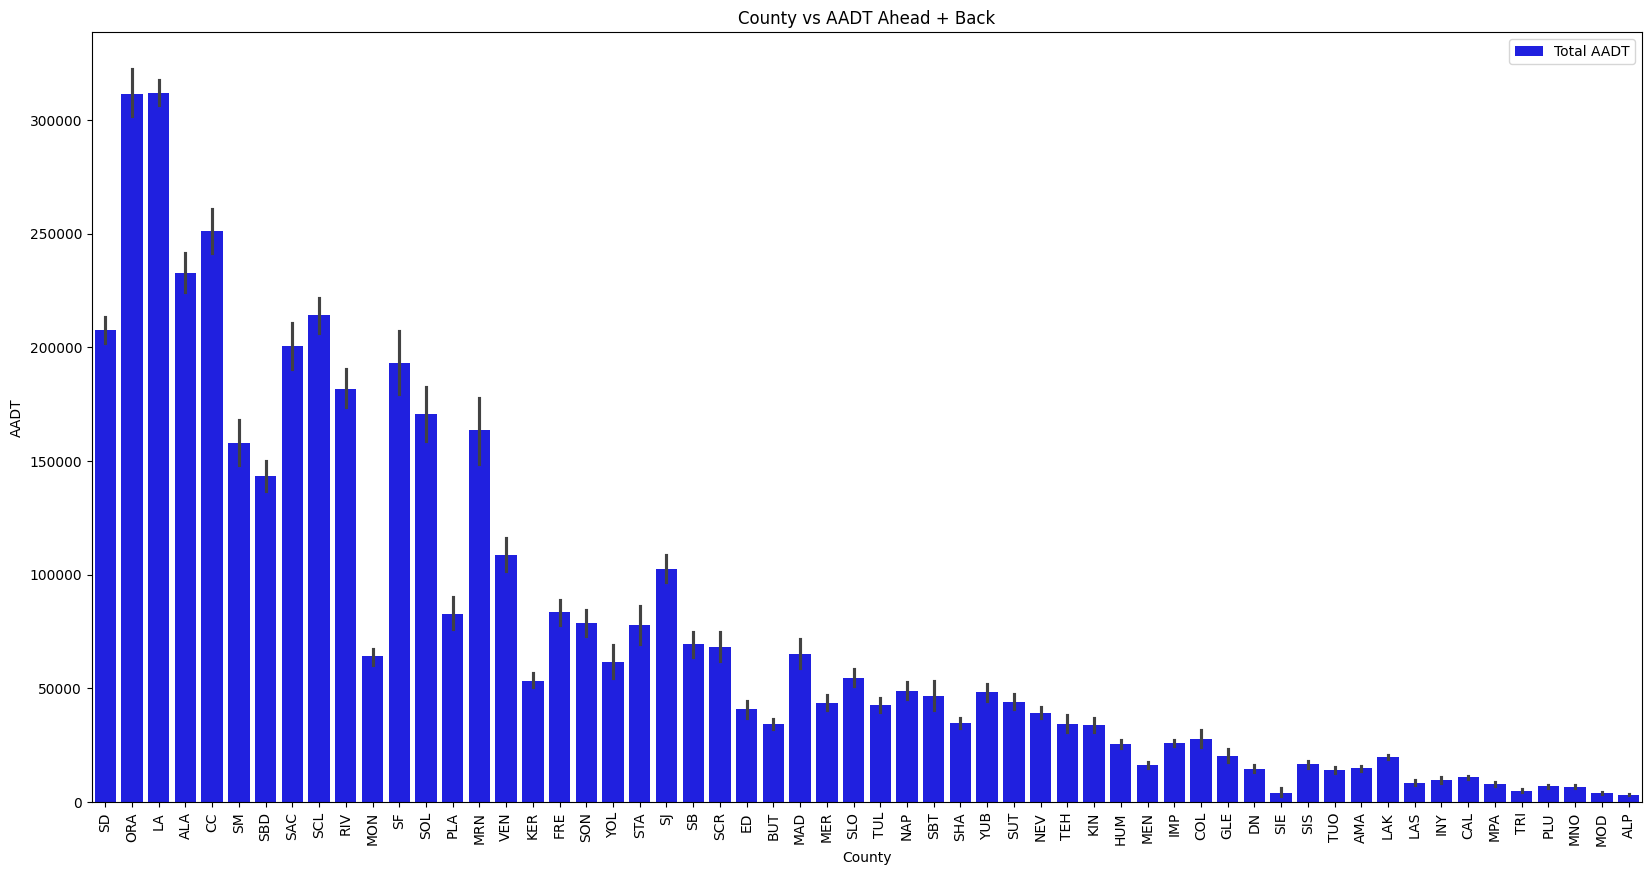

In [4]:

# Graph 3: County vs AADT Ahead + Back
sns.barplot(x='CNTY', y='TOTAL_AADT', data=df, order=df.sort_values('TOTAL_AADT', ascending=False).CNTY, color='blue', label='Total AADT')
plt.pyplot.xlabel('County')
plt.pyplot.ylabel('AADT')
plt.pyplot.title('County vs AADT Ahead + Back')
plt.pyplot.legend()
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

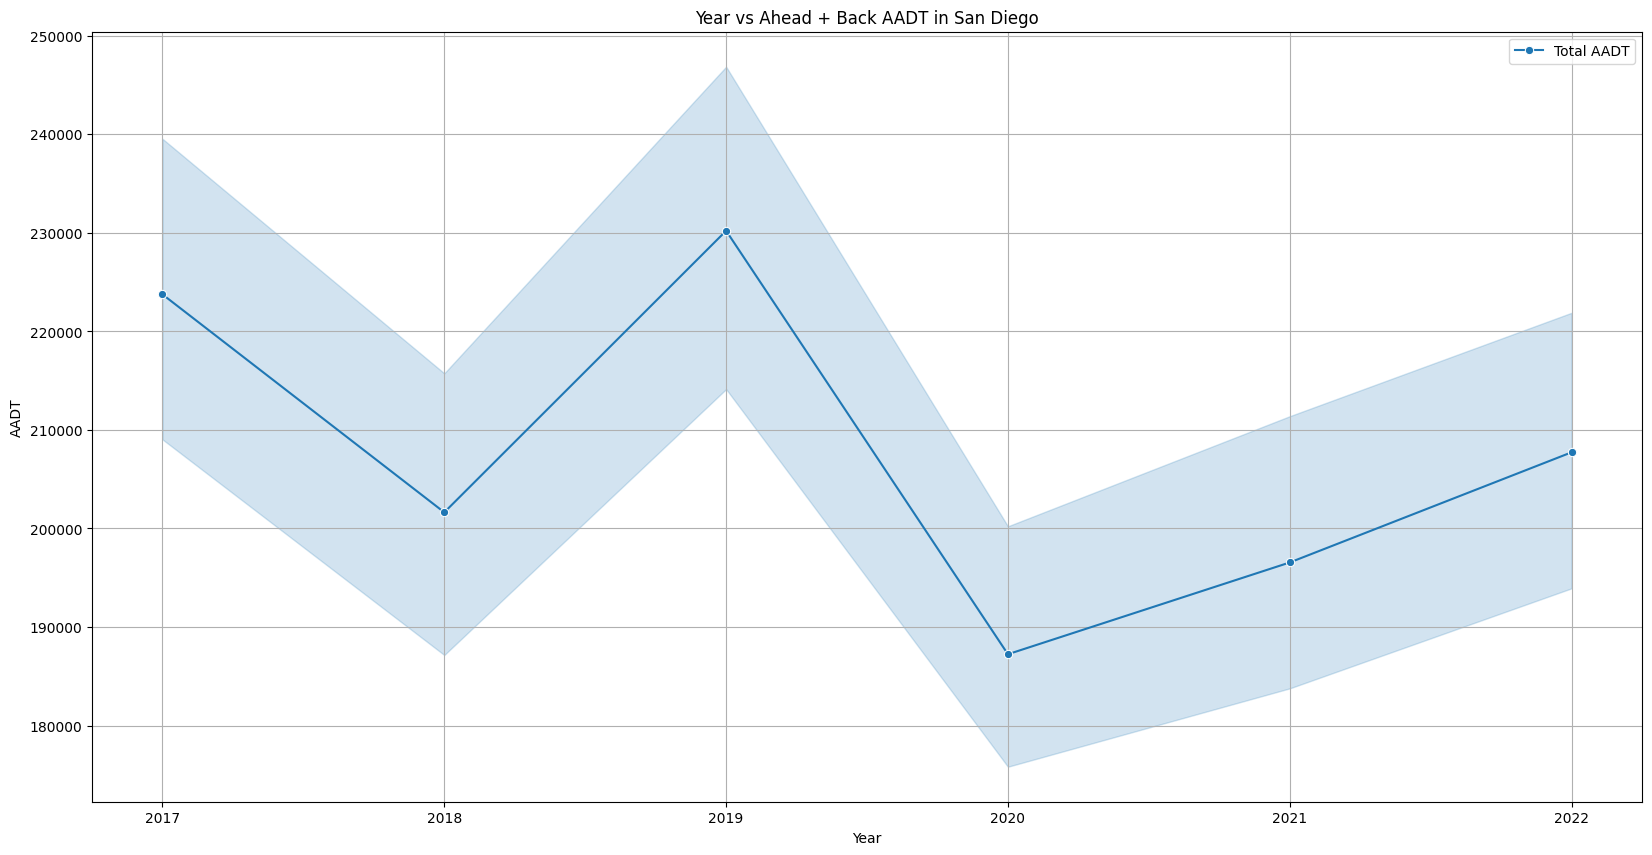

In [36]:

# Graph 4: Year vs Ahead + Back AADT in San Diego
sns.lineplot(x='YEAR', y='TOTAL_AADT', data=sd_df, marker='o', label='Total AADT')
plt.pyplot.xlabel('Year')
plt.pyplot.ylabel('AADT')
plt.pyplot.title('Year vs Ahead + Back AADT in San Diego')
plt.pyplot.legend()
plt.pyplot.grid(True)
plt.pyplot.show()

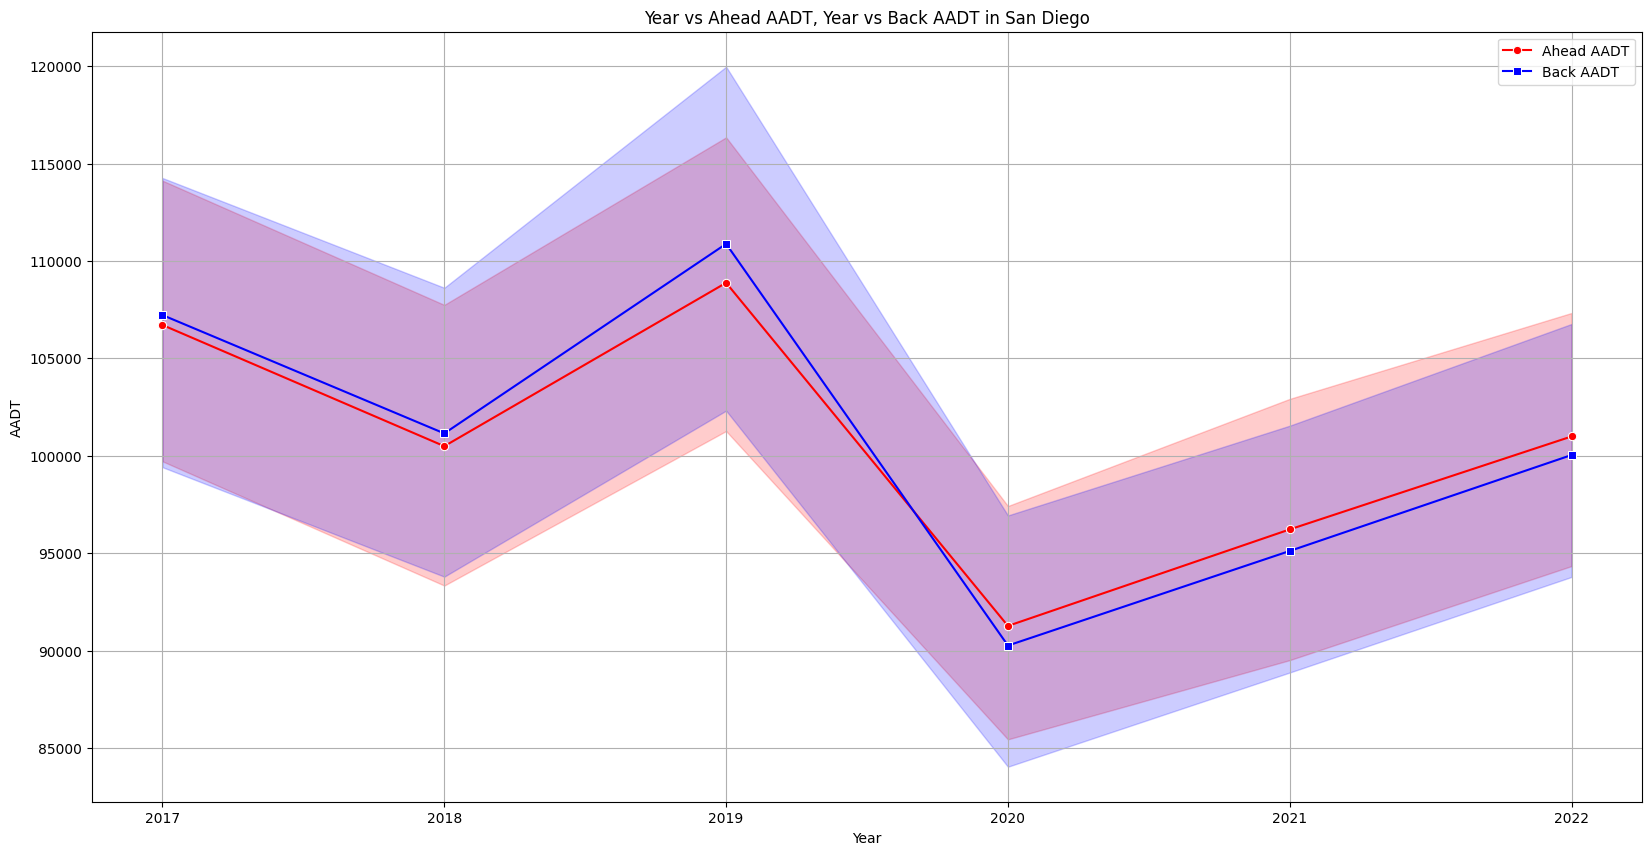

In [37]:

# Graph 5: Year vs Ahead AADT, Year vs Back AADT in San Diego
sns.lineplot(x='YEAR', y='AHEAD_AADT', data=sd_df, marker='o', label='Ahead AADT', color='red')
sns.lineplot(x='YEAR', y='BACK_AADT', data=sd_df, marker='s', label='Back AADT', color='blue')
plt.pyplot.xlabel('Year')
plt.pyplot.ylabel('AADT')
plt.pyplot.title('Year vs Ahead AADT, Year vs Back AADT in San Diego')
plt.pyplot.legend()
plt.pyplot.grid(True)
plt.pyplot.show()

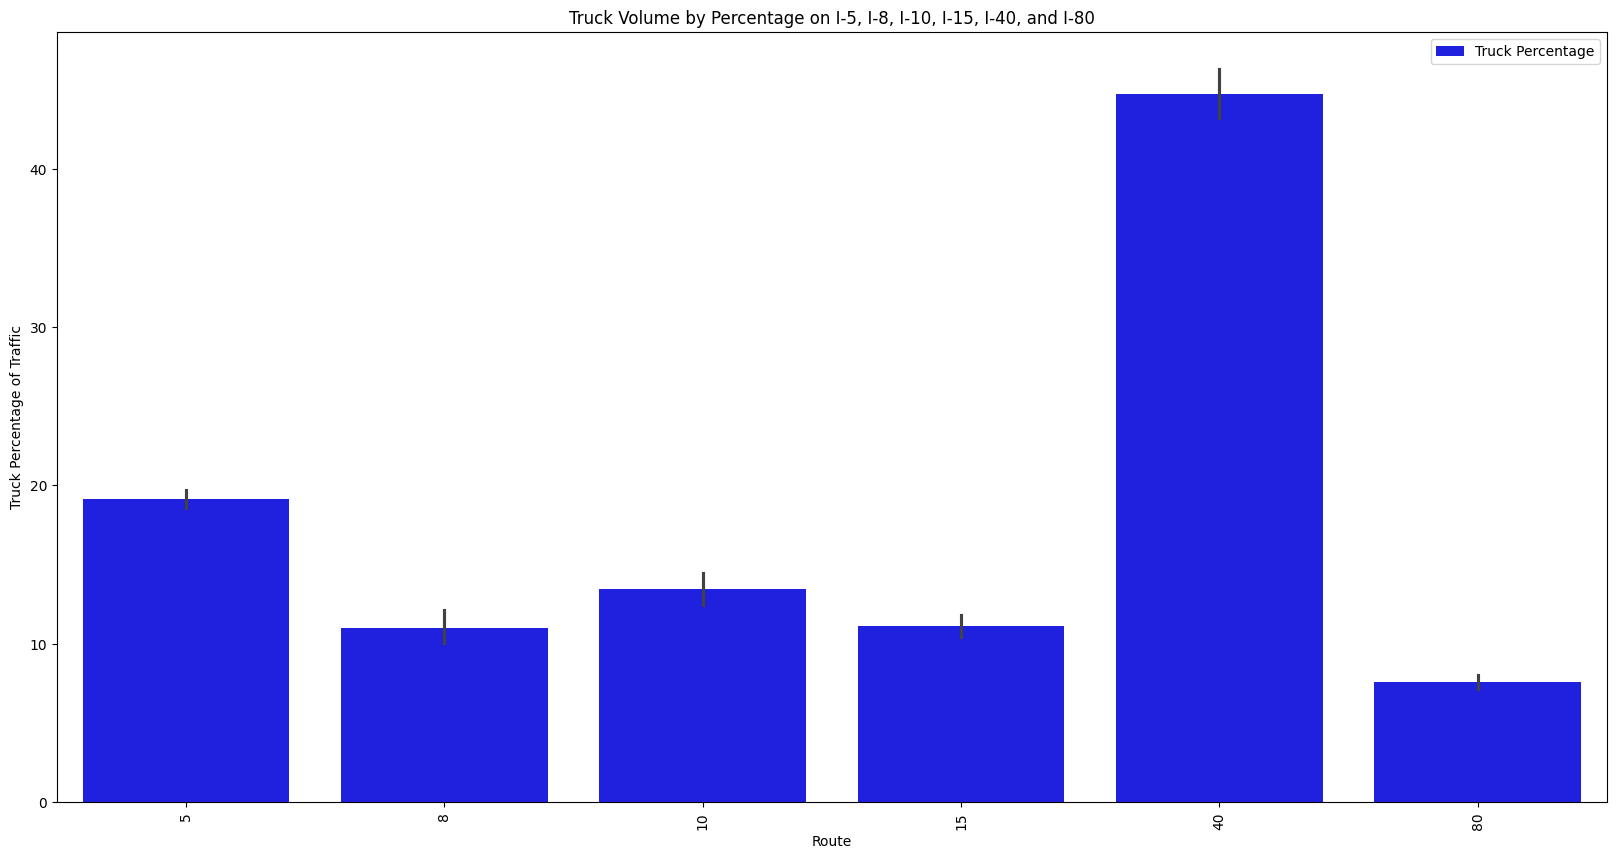

In [41]:
# Graph 6: Plot of truck volume by percentage on I-5, I-8, I-10, I-15, I-40, and I-80
sns.barplot(x='RTE', y='TRK_PERCENT_TOT', data=sub_truck_df, color='blue', label='Truck Percentage')
plt.pyplot.xlabel('Route')
plt.pyplot.ylabel('Truck Percentage of Traffic')
plt.pyplot.title('Truck Volume by Percentage on I-5, I-8, I-10, I-15, I-40, and I-80')
plt.pyplot.legend()
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

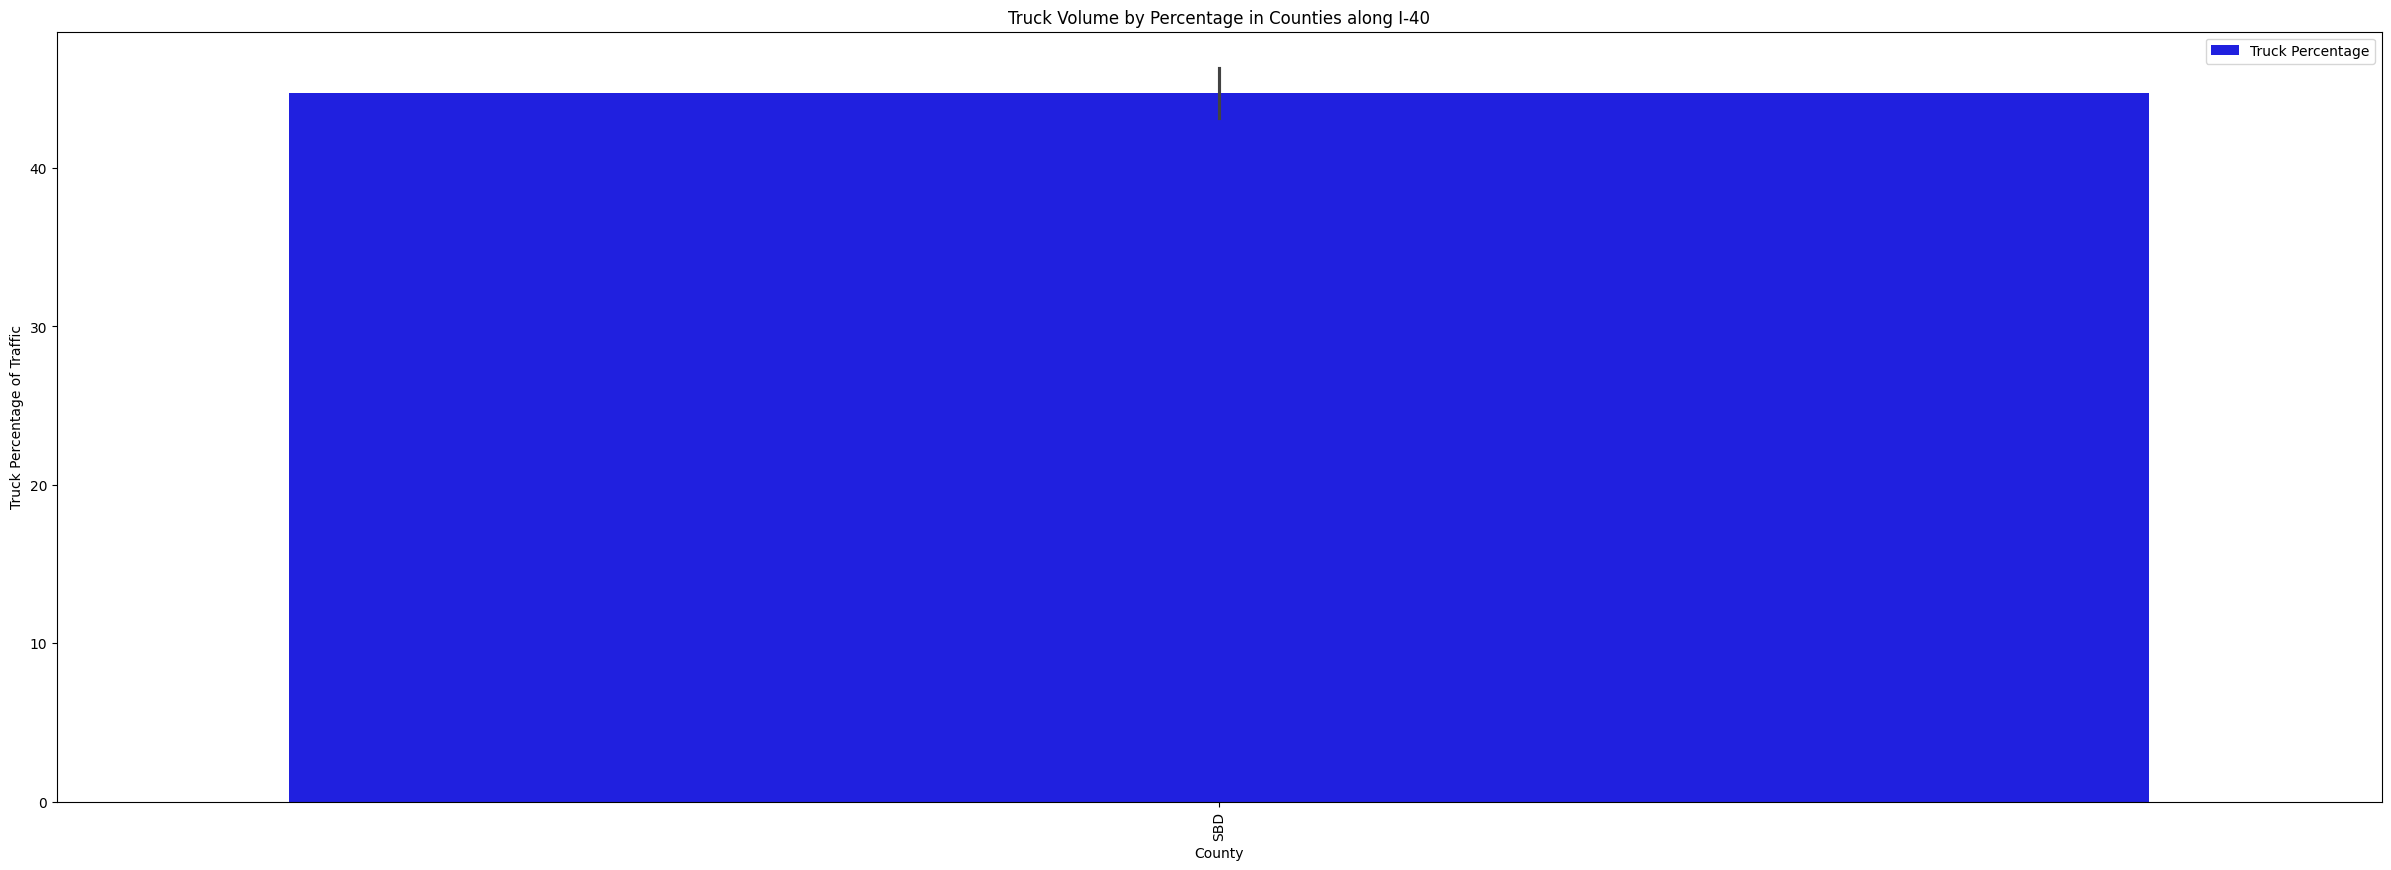

In [42]:
# Graph 7: Plot of truck volume by percentage for each county along I-40
sub_truck_df_rte40 = sub_truck_df[sub_truck_df['RTE'] == '40']
fig, ax = plt.pyplot.subplots(figsize=(30, 10))
sns.barplot(x='CNTY', y='TRK_PERCENT_TOT', data=sub_truck_df_rte40, color='blue', label='Truck Percentage')
plt.pyplot.xlabel('County')
plt.pyplot.ylabel('Truck Percentage of Traffic')
plt.pyplot.title('Truck Volume by Percentage in Counties along I-40')
plt.pyplot.legend()
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()
# NOTE: THIS PLOT IS USELESS, I-40 ONLY GOES THROUGH ONE COUNTY (SAN BERNADINO). Including code for reference

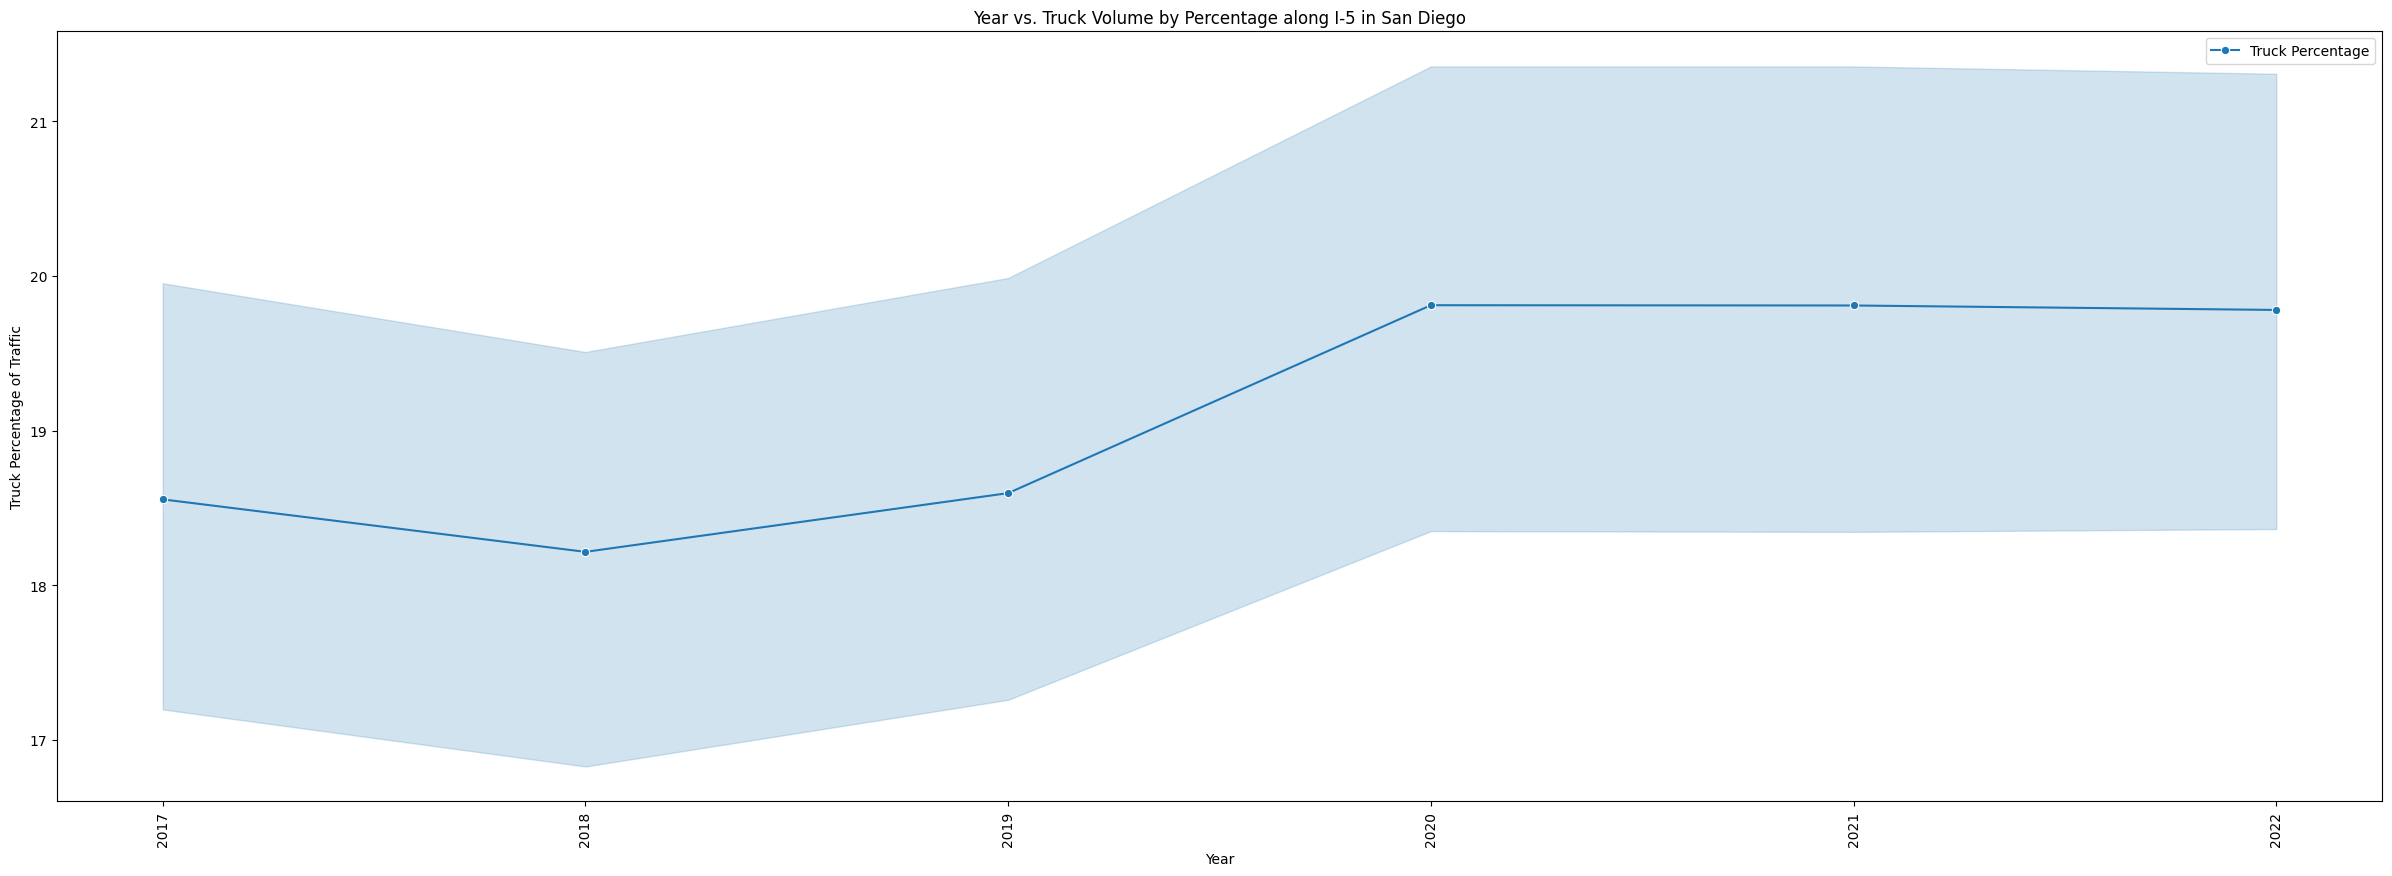

In [44]:
# Graph 8: Year vs. Plot of truck volume by percentage along I-5
sub_truck_df_rte5 = sub_truck_df[sub_truck_df['RTE'] == '5']
sub_truck_df_rte5_SD = sub_truck_df_rte5[sub_truck_df_rte5['CNTY'] == 'SD']
fig, ax = plt.pyplot.subplots(figsize=(30, 10))
sns.lineplot(x='YEAR', y='TRK_PERCENT_TOT', data=sub_truck_df_rte5, marker='o', label='Truck Percentage')
plt.pyplot.xlabel('Year')
plt.pyplot.ylabel('Truck Percentage of Traffic')
plt.pyplot.title('Year vs. Truck Volume by Percentage along I-5 in San Diego')
plt.pyplot.legend()
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()